In [1]:
import nibabel as nb
import numpy as np

img = nb.load('nsdgeneral.nii.gz')
mask = np.asanyarray(img.dataobj)==1


/tmp/ipykernel_12613/808402460.py:26: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


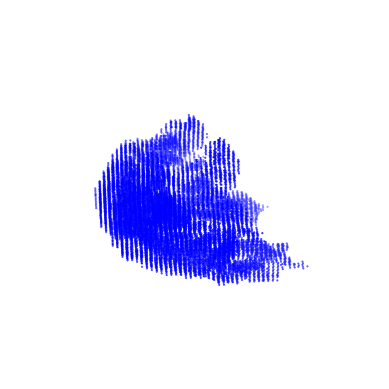

In [14]:
import imageio
import matplotlib.pyplot as plt
# 创建一个 3D 图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_axis_off()
# 获取 mask 中为 True 的点的坐标
x, y, z = np.where(mask)

# 绘制这些点
ax.scatter(x, y, z, c='b', marker='.',s=1)

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 设置视角
ax.view_init(elev=30, azim=0)

# 生成旋转的 GIF
images = []
for angle in range(0, 360, 5):  # 每 5 度旋转一次
    ax.view_init(elev=30, azim=angle)
    fig.canvas.draw()  # 重新绘制图形
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)

# 保存为 GIF
imageio.mimsave('rotation_roi.gif', images, duration=50, loop=0)

# 显示图形
plt.show()

In [2]:
mask.dtype

dtype('<f8')

In [3]:
mask.shape

(81, 104, 83)

In [2]:
import nibabel as nb

import numpy as np

data = np.load('raw/betas_session01.npy',mmap_mode='r')
data = data[:,:,:,0]
brain = data!=0
# print(brain.sum())

/tmp/ipykernel_12613/970495554.py:27: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


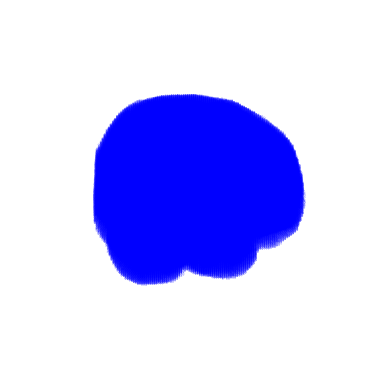

In [17]:
import imageio
import matplotlib.pyplot as plt
# 创建一个 3D 图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_axis_off()
# 获取 mask 中为 True 的点的坐标
x, y, z = np.where(brain)

# 绘制这些点
ax.scatter(x, y, z, c='r', marker='.',s=0.05,alpha = 1)


# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 设置视角
ax.view_init(elev=30, azim=0)

# 生成旋转的 GIF
images = []
for angle in range(0, 360, 360):  # 每 5 度旋转一次
    ax.view_init(elev=30, azim=angle)
    fig.canvas.draw()  # 重新绘制图形
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)

# 保存为 GIF
imageio.mimsave('rotarion_brain.gif', images, duration=50, loop=0)

# 显示图形
plt.show()

/tmp/ipykernel_15007/2994105010.py:28: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


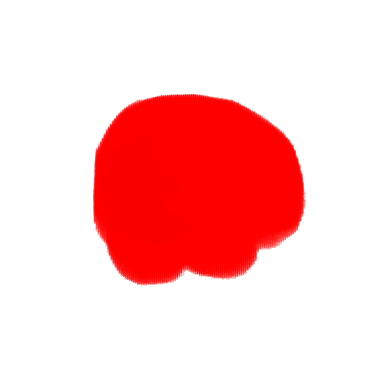

In [75]:
import imageio
import matplotlib.pyplot as plt
# 创建一个 3D 图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_axis_off()
# 获取 mask 中为 True 的点的坐标
x, y, z = np.where(brain)
x_, y_, z_ = np.where(mask)

# 绘制这些点
ax.scatter(x, y, z, c='r', marker='.',s=0.05,alpha = 1)
ax.scatter(x_, y_, z_, c='b', marker='.',s=1)

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 设置视角
ax.view_init(elev=30, azim=0)

# 生成旋转的 GIF
images = []
for angle in range(0, 360, 360):  # 每 5 度旋转一次
    ax.view_init(elev=30, azim=angle)
    fig.canvas.draw()  # 重新绘制图形
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)

# 保存为 GIF
imageio.mimsave('rotarion_brain_with_roi.gif', images, duration=50, loop=0)

# 显示图形
plt.show()

In [19]:
brain.shape
mask.shape

(81, 104, 83)

In [10]:
norm_data = (data-data.min())/(data.max()-data.min())

/tmp/ipykernel_15007/1181147512.py:1: RuntimeWarning: overflow encountered in scalar subtract
  norm_data = (data-data.min())/(data.max()-data.min())


In [81]:
brain = data!=0
norm_data = (np.clip(data,-300,300)+300)/600 

/tmp/ipykernel_15007/1681002764.py:15: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


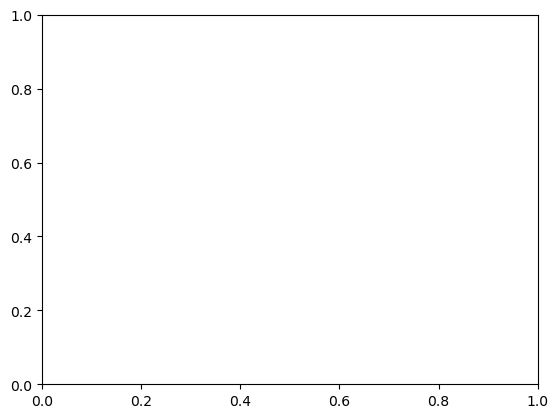

In [89]:
import imageio
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
images = []
for i in range(0,81):
    ax.set_axis_off()
    ax.set_xlim(0,104)
    ax.set_ylim(0,83)
    # x, y = np.where(brain[i,:,:])
    x_, y_ = np.where(mask[i,:,:])
    # ax.scatter(x,y,s=3, c=norm_data[i,brain[i,:,:]],cmap='jet')
    ax.scatter(x_,y_,c=norm_data[i,mask[i,:,:]],s=5,marker='o',cmap='jet')
    fig.canvas.draw()  # 重新绘制图形
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.cla()
    
    
imageio.mimsave('scan_roi.gif', images, duration=50, loop=0)


In [27]:
data = data[:,:,:,0]


In [61]:
x.shape

(0,)

/tmp/ipykernel_15007/1210670277.py:15: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


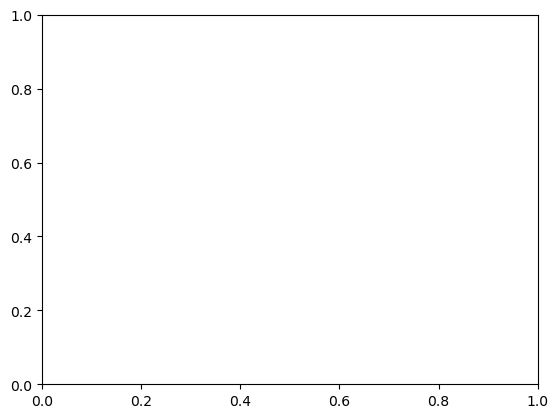

In [91]:
import imageio
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot()
images = []
for i in range(0,81):
    ax.set_axis_off()
    ax.set_xlim(0,104)
    ax.set_ylim(0,83)
    x, y = np.where(brain[i,:,:])
    # x_, y_ = np.where(mask[i,:,:])
    ax.scatter(x,y,s=5, c=norm_data[i,brain[i,:,:]],cmap='jet',marker='o')
    # ax.scatter(x_,y_,c=norm_data[i,mask[i,:,:]],s=5,marker='o',cmap='jet')
    fig.canvas.draw()  # 重新绘制图形
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.cla()
    
    
imageio.mimsave('scan_brain.gif', images, duration=50, loop=0)
